In [1]:
# Ratings:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# pulling data

data = pd.read_csv("../output_data/clean_data_for_analysis.csv")
#print(data["Title"].count())
data.head()


,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others


In [2]:
# Filtering by year
data["Release"] = data["Release"].astype("datetime64")
data["Year"] = data["Release"].dt.year
data["Year"] = data["Year"].astype("str")

data.count() 

# Records = 1153

Title          1153
Type           1153
Release        1153
Runtime        1153
Genre          1153
Nominations     167
Metascore      1053
imdbRating     1153
imdbVotes      1153
imdbID         1153
Budget          500
Gross           837
Platform       1153
Year           1153
dtype: int64

In [3]:
# Filtering by source box or netflix

box = data.loc[data["Gross"] > 0,:]
#box.count()
# Records = 837

nf = data.loc[data["Platform"] == "netflix",:]
#nf.count()
# Records = 151

<function matplotlib.pyplot.show(*args, **kw)>

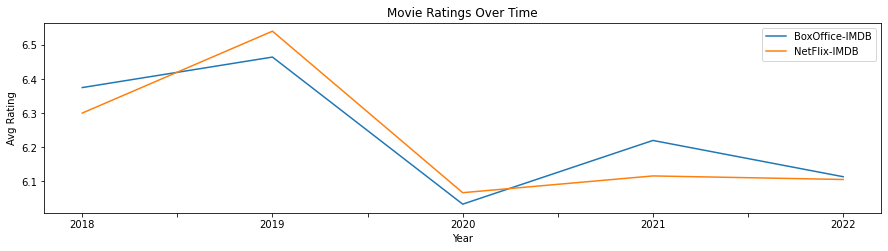

In [4]:
# IMDB Ratings 

box_imdb = box.groupby(["Year"]).mean()["imdbRating"] 
#box_imdb

nf_imdb = nf.groupby(["Year"]).mean()["imdbRating"] 
#nf_imdb

imdb_df = pd.DataFrame({"BoxOffice-IMDB": box_imdb, "NetFlix-IMDB": nf_imdb})
#imdb_df

imdb_df.plot(kind="line", figsize=(15,3.5))
plt.title("Movie Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Rating")

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

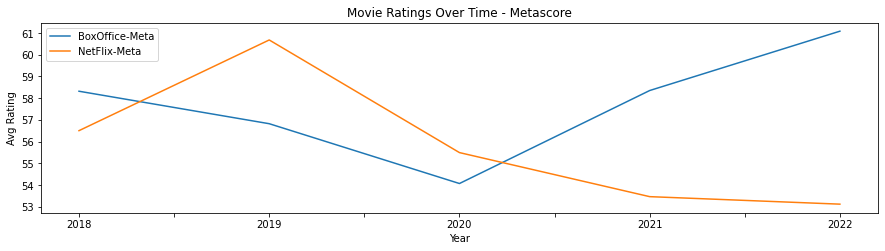

In [5]:
# Meta Ratings 

box_meta = box.groupby(["Year"]).mean()["Metascore"]
#box_meta


nf_meta = nf.groupby(["Year"]).mean()["Metascore"] 
#nf_meta

meta_df = pd.DataFrame({"BoxOffice-Meta": box_meta, "NetFlix-Meta": nf_meta})
#meta_df

meta_df.plot(kind="line", figsize=(15,3.5))
plt.title("Movie Ratings Over Time - Metascore")
plt.xlabel("Year")
plt.ylabel("Avg Rating")

plt.show